In [1]:
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import Geometry

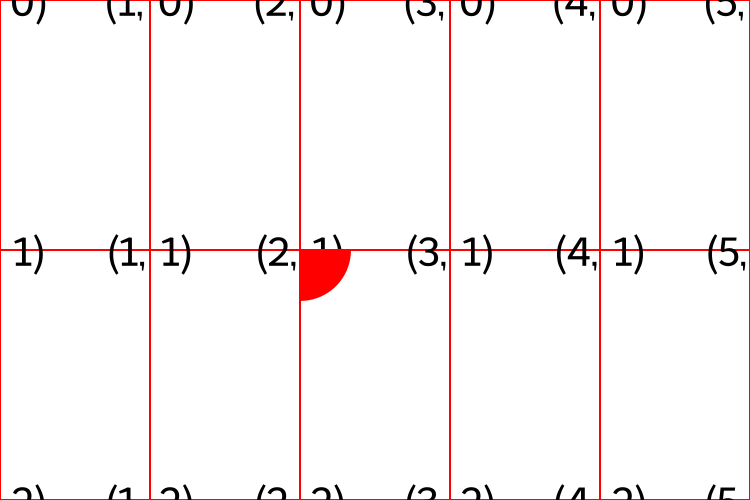

In [53]:
smls = [""]
nRows = 2
nCols = 5
panelx = 150
panely = 250
width = panelx * nCols
height = panely * nRows
d2d = Draw.MolDraw2DSVG(width, height, panelx, panely)

d2d.DrawMolecules(
    [Chem.MolFromSmiles(sml) for sml in smls],
)

# Draw red grid lines
d2d.SetColour((1, 0, 0))
for row in range(nRows + 1):
    start_point = Geometry.Point2D(0, row * panely)
    end_point = Geometry.Point2D(width, row * panely)
    d2d.DrawLine(start_point, end_point, rawCoords=True)
for col in range(nCols + 1):
    start_point = Geometry.Point2D(col * panelx, 0)
    end_point = Geometry.Point2D(col * panelx, height)
    d2d.DrawLine(start_point, end_point, rawCoords=True)

# Draw arrows
# Constant used to make arrowhead size constant
# regardless of the distance between the two points
# (i.e. the length of the arrow)
arrow_length = 10
p1 = Geometry.Point2D(0, 0)
for i in range(nRows + 1):
    for j in range(nCols + 1):
        p2 = Geometry.Point2D((j) * panelx, (i) * panely)
        # Determine the length of the arrow
        length = ((p2.x - p1.x) ** 2 + (p2.y - p1.y) ** 2) ** 0.5
        try:
            frac = arrow_length / length
        except ZeroDivisionError:
            frac = arrow_length
        # d2d.DrawArrow(
        #     p1,
        #     p2,
        #     rawCoords=True,
        #     asPolygon=False,
        #     frac=1,
        # )
        # d2d.DrawString(
        #     f"({j}, {i})",
        #     p2,
        #     rawCoords=True,
        # )
        # Molecular coordinates
        pm = Geometry.Point2D(j, i)
        d2d.DrawString(
            f"({j}, {i})",
            p2,
            rawCoords=True,
        )
p11 = Geometry.Point2D(1 * panelx, 1 * panely)
p21 = Geometry.Point2D(2 * panelx, 1 * panely)
# d2d.DrawArrow(
#     p11,
#     p21,
#     rawCoords=True,
#     asPolygon=False,
#     color=(0, 0, 1),
#     angle=0.5235987755982988,
#     frac=0.2,
# )
p31 = Geometry.Point2D(3 * panelx, 1 * panely)
p41 = Geometry.Point2D(4 * panelx, 1 * panely)
# d2d.DrawArrow(
#     # p31,
#     # p41,
#     Geometry.Point2D(0, 0),
#     Geometry.Point2D(1, 1),
#     # rawCoords=True,
#     asPolygon=True,
#     color=(0, 1, 0),
#     # angle=1.570795,
#     frac=0.2,
# )
d2d.DrawArc(p21, 50, 0, 90, rawCoords=True)
d2d.FinishDrawing()
svg = d2d.GetDrawingText()
SVG(svg)